<a href="https://colab.research.google.com/github/VishwanathKundral/INSE-6220-Final-Report/blob/main/modelCompare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,5)

!pip install shap
import shap

data_read_file = pd.read_csv("DNSSecurityTrafficData.csv", encoding="utf-8")

!pip install pycaret

from pycaret.utils import version
version()

sample_data = data_read_file.sample(frac=0.9, random_state=786)
data_unseen = data_read_file.drop(sample_data.index)

sample_data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(sample_data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

from pycaret.classification import *
clf = setup(data=sample_data, target='Traffic-Class', train_size=0.7, session_id=123)

best_model = compare_models()
print("====================")
print("show the best model and their statistics: before PCA")
print("====================")
best_model

!pip install statsmodels --upgrade
clf_pca = setup(data=sample_data, target='Traffic-Class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 12)
best_model_pca = compare_models()
print("====================")
print("show the best model and their statistics: after PCA")
print("====================")
best_model_pca
tuned_best_model_pca = tune_model(best_model_pca)
evaluate_model(tuned_best_model_pca)

print("table after pca:")
print("********* ET data *********")
et_pca = create_model('et')
tuned_et_pca = tune_model(et_pca)
evaluate_model(tuned_et_pca)

print("********* XGBoost data *********")
xgboost_pca = create_model('xgboost')
tuned_xgboost_pca = tune_model(xgboost_pca)
evaluate_model(tuned_xgboost_pca)

print("********* RF data *********")
rf_pca = create_model('rf')
tuned_rf_pca = tune_model(rf_pca)
evaluate_model(tuned_rf_pca)


Data for Modeling: (32398, 25)
Unseen Data For Predictions: (3600, 25)


,Description,Value
0,Session id,123
1,Target,Traffic-Class
2,Target type,Binary
3,Target mapping,"1: 0, 2: 1"
4,Original data shape,"(32398, 25)"
5,Transformed data shape,"(32398, 25)"
6,Transformed train set shape,"(22678, 25)"
7,Transformed test set shape,"(9720, 25)"
8,Numeric features,24
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9998,1.0000,0.9998,0.9998,0.9998,0.9996,0.9996,2.9440
xgboost,Extreme Gradient Boosting,0.9998,1.0000,0.9998,0.9998,0.9998,0.9996,0.9996,0.4010
lightgbm,Light Gradient Boosting Machine,0.9998,1.0000,0.9998,0.9998,0.9998,0.9996,0.9996,2.7310
gbc,Gradient Boosting Classifier,0.9994,1.0000,0.9994,0.9994,0.9994,0.9988,0.9988,13.0220
rf,Random Forest Classifier,0.9990,1.0000,0.9990,0.9990,0.9990,0.9981,0.9981,4.5290
dt,Decision Tree Classifier,0.9986,0.9986,0.9986,0.9986,0.9986,0.9973,0.9973,0.2710
et,Extra Trees Classifier,0.9984,0.9999,0.9984,0.9984,0.9984,0.9967,0.9967,1.8280
knn,K Neighbors Classifier,0.9262,0.9712,0.9262,0.9262,0.9262,0.8524,0.8524,0.8960
lda,Linear Discriminant Analysis,0.9048,0.9514,0.9048,0.9094,0.9045,0.8095,0.8142,0.1530
ridge,Ridge Classifier,0.9047,0.0000,0.9047,0.9094,0.9044,0.8094,0.8141,0.0810


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

show the best model and their statistics: before PCA


,Description,Value
0,Session id,123
1,Target,Traffic-Class
2,Target type,Binary
3,Target mapping,"1: 0, 2: 1"
4,Original data shape,"(32398, 25)"
5,Transformed data shape,"(32398, 13)"
6,Transformed train set shape,"(22678, 13)"
7,Transformed test set shape,"(9720, 13)"
8,Numeric features,24
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9888,0.9994,0.9888,0.9888,0.9888,0.9775,0.9775,1.4520
xgboost,Extreme Gradient Boosting,0.9882,0.9991,0.9882,0.9882,0.9882,0.9764,0.9764,0.6800
rf,Random Forest Classifier,0.9868,0.9992,0.9868,0.9868,0.9868,0.9736,0.9737,6.0190
lightgbm,Light Gradient Boosting Machine,0.9849,0.9988,0.9849,0.9850,0.9849,0.9698,0.9699,1.7810
knn,K Neighbors Classifier,0.9847,0.9956,0.9847,0.9848,0.9847,0.9695,0.9696,0.3330
dt,Decision Tree Classifier,0.9725,0.9725,0.9725,0.9725,0.9725,0.9450,0.9450,0.6170
gbc,Gradient Boosting Classifier,0.9526,0.9917,0.9526,0.9530,0.9526,0.9052,0.9056,9.3470
ada,Ada Boost Classifier,0.9237,0.9751,0.9237,0.9246,0.9237,0.8474,0.8483,2.1230
svm,SVM - Linear Kernel,0.8478,0.0000,0.8478,0.8533,0.8472,0.6956,0.7011,0.2310
lr,Logistic Regression,0.8310,0.8810,0.8310,0.8330,0.8307,0.6620,0.6640,0.2050


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

show the best model and their statistics: after PCA


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9114,0.9755,0.9114,0.9161,0.9111,0.8228,0.8275
1,0.9202,0.9784,0.9202,0.9246,0.9200,0.8404,0.8448
2,0.9092,0.9783,0.9092,0.9140,0.9089,0.8184,0.8231
3,0.9321,0.9812,0.9321,0.9345,0.9320,0.8642,0.8666
4,0.9189,0.9801,0.9189,0.9235,0.9187,0.8378,0.8423
5,0.9290,0.9832,0.9290,0.9333,0.9288,0.8580,0.8623
6,0.9158,0.9769,0.9158,0.9204,0.9156,0.8316,0.8362
7,0.9101,0.9788,0.9101,0.9182,0.9096,0.8201,0.8282
8,0.9157,0.9776,0.9157,0.9209,0.9155,0.8315,0.8366


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

table after pca:
********* ET data *********


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9859,0.9988,0.9859,0.9859,0.9859,0.9718,0.9718
1,0.9916,0.9993,0.9916,0.9917,0.9916,0.9832,0.9833
2,0.9899,0.9994,0.9899,0.9899,0.9899,0.9797,0.9797
3,0.9877,0.9993,0.9877,0.9877,0.9877,0.9753,0.9753
4,0.9872,0.9996,0.9872,0.9873,0.9872,0.9744,0.9745
5,0.9916,0.9997,0.9916,0.9916,0.9916,0.9832,0.9833
6,0.9850,0.9993,0.9850,0.9850,0.9850,0.9700,0.9700
7,0.9912,0.9997,0.9912,0.9912,0.9912,0.9824,0.9824
8,0.9881,0.9995,0.9881,0.9881,0.9881,0.9762,0.9762


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9114,0.9755,0.9114,0.9161,0.9111,0.8228,0.8275
1,0.9202,0.9784,0.9202,0.9246,0.9200,0.8404,0.8448
2,0.9092,0.9783,0.9092,0.9140,0.9089,0.8184,0.8231
3,0.9321,0.9812,0.9321,0.9345,0.9320,0.8642,0.8666
4,0.9189,0.9801,0.9189,0.9235,0.9187,0.8378,0.8423
5,0.9290,0.9832,0.9290,0.9333,0.9288,0.8580,0.8623
6,0.9158,0.9769,0.9158,0.9204,0.9156,0.8316,0.8362
7,0.9101,0.9788,0.9101,0.9182,0.9096,0.8201,0.8282
8,0.9157,0.9776,0.9157,0.9209,0.9155,0.8315,0.8366


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

********* XGBoost data *********


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9841,0.9990,0.9841,0.9841,0.9841,0.9683,0.9683
1,0.9899,0.9985,0.9899,0.9899,0.9899,0.9797,0.9798
2,0.9903,0.9989,0.9903,0.9903,0.9903,0.9806,0.9806
3,0.9872,0.9992,0.9872,0.9872,0.9872,0.9744,0.9744
4,0.9899,0.9995,0.9899,0.9899,0.9899,0.9797,0.9797
5,0.9899,0.9995,0.9899,0.9899,0.9899,0.9797,0.9798
6,0.9863,0.9991,0.9863,0.9863,0.9863,0.9727,0.9727
7,0.9877,0.9995,0.9877,0.9877,0.9877,0.9753,0.9754
8,0.9872,0.9992,0.9872,0.9872,0.9872,0.9744,0.9744


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9841,0.9989,0.9841,0.9843,0.9841,0.9683,0.9684
1,0.9894,0.9992,0.9894,0.9895,0.9894,0.9788,0.9789
2,0.9894,0.9994,0.9894,0.9895,0.9894,0.9788,0.9789
3,0.9881,0.9992,0.9881,0.9882,0.9881,0.9762,0.9763
4,0.9916,0.9996,0.9916,0.9917,0.9916,0.9832,0.9833
5,0.9903,0.9995,0.9903,0.9903,0.9903,0.9806,0.9806
6,0.9859,0.9992,0.9859,0.9860,0.9859,0.9718,0.9719
7,0.9846,0.9995,0.9846,0.9848,0.9846,0.9691,0.9693
8,0.9863,0.9989,0.9863,0.9864,0.9863,0.9727,0.9727


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

********* RF data *********


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9797,0.9984,0.9797,0.9797,0.9797,0.9594,0.9594
1,0.9881,0.9993,0.9881,0.9882,0.9881,0.9762,0.9763
2,0.9894,0.9992,0.9894,0.9894,0.9894,0.9788,0.9788
3,0.9837,0.9990,0.9837,0.9837,0.9837,0.9674,0.9674
4,0.9894,0.9995,0.9894,0.9894,0.9894,0.9788,0.9788
5,0.9916,0.9995,0.9916,0.9917,0.9916,0.9832,0.9833
6,0.9841,0.9990,0.9841,0.9841,0.9841,0.9683,0.9683
7,0.9881,0.9995,0.9881,0.9882,0.9881,0.9762,0.9763
8,0.9859,0.9992,0.9859,0.9859,0.9859,0.9718,0.9718


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9303,0.9852,0.9303,0.9332,0.9302,0.8607,0.8635
1,0.9334,0.9867,0.9334,0.9359,0.9333,0.8669,0.8693
2,0.9352,0.9879,0.9352,0.9370,0.9351,0.8704,0.8722
3,0.9383,0.9871,0.9383,0.9400,0.9382,0.8766,0.8783
4,0.9330,0.9879,0.9330,0.9361,0.9329,0.8660,0.8691
5,0.9378,0.9898,0.9378,0.9409,0.9377,0.8757,0.8788
6,0.9290,0.9843,0.9290,0.9317,0.9289,0.8580,0.8607
7,0.9347,0.9878,0.9347,0.9386,0.9346,0.8695,0.8733
8,0.9356,0.9875,0.9356,0.9386,0.9355,0.8712,0.8742


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

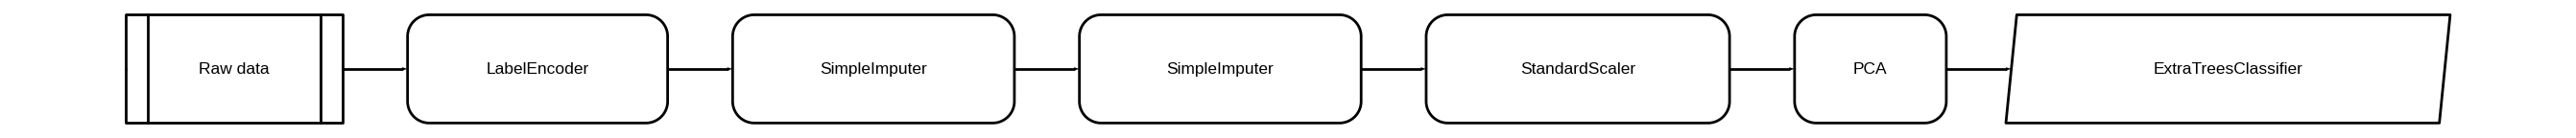

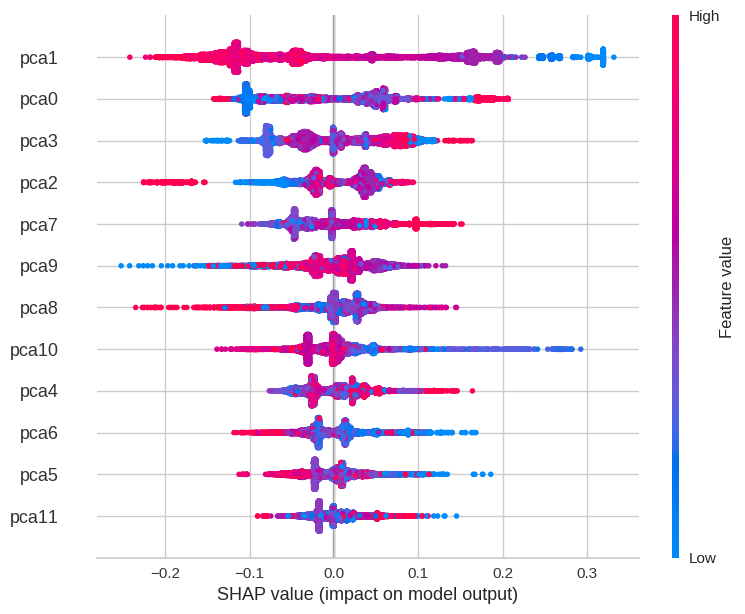

In [ ]:
rf_pca = create_model('et')
tuned_rf_pca = tune_model(rf_pca)
evaluate_model(tuned_rf_pca)

interpret_model(tuned_rf_pca, plot='summary')
interpret_model(tuned_rf_pca, plot='reason', observation=32)
interpret_model(tuned_rf_pca, plot='reason')